In [2]:
pip install yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl (1.4 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=19eeb149ebe63590bd483575b01eb48b01cfe1a545907552cc824fb748037997
  Stored in directory: c:\users\sipte\appdata\local\pip\cache\wheels\1a\57\6a\b

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
start = '2015-01-01'
end = '2025-3-18'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.045292,26.365890,26.010056,26.253730,28951268
1,2015-01-05,25.502361,26.021471,25.462164,25.968368,41196796
2,2015-01-06,24.911289,25.616753,24.866129,25.558439,57998800
3,2015-01-07,24.868612,25.173526,24.796651,25.161417,41301082
4,2015-01-08,24.947021,24.986724,24.367366,24.714266,67071641
...,...,...,...,...,...,...
2561,2025-03-11,165.979996,168.654999,163.240005,166.679993,23705900
2562,2025-03-12,169.000000,169.529999,165.479996,168.470001,19880100
2563,2025-03-13,164.729996,168.119995,164.070007,167.979996,15206200


In [10]:
ma_100_days = data.Close.rolling(100).mean()

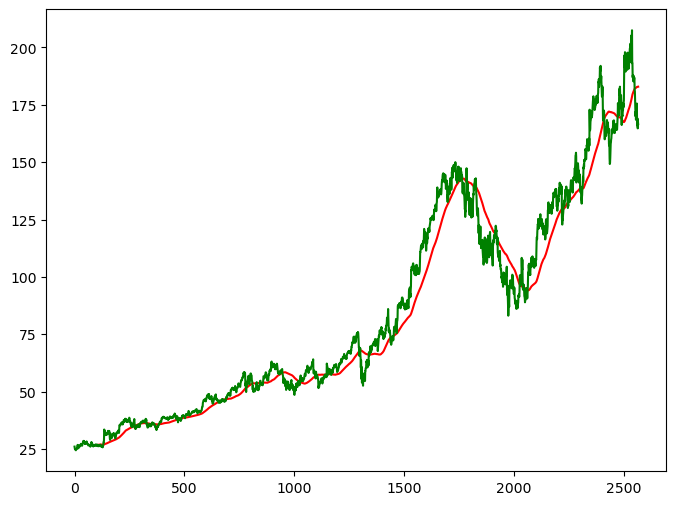

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

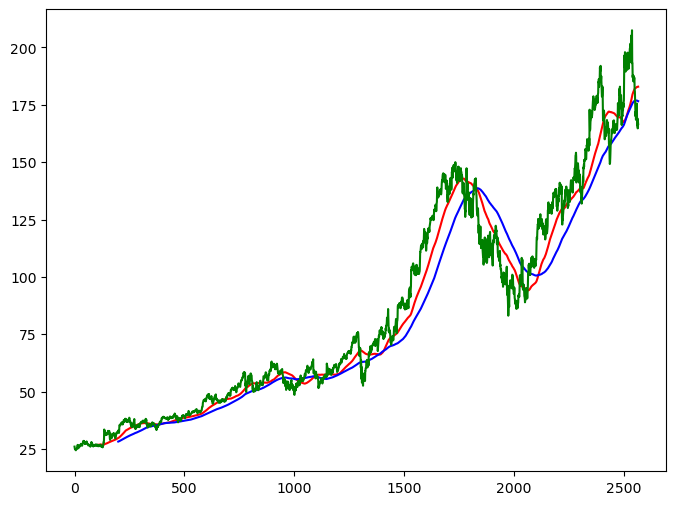

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
data.dropna(inplace=True)

In [15]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [16]:
data_train.shape[0]

2052

In [17]:
data_test.shape[0]

514

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale = scaler.fit_transform(data_train)

In [20]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [21]:
x, y = np.array(x), np.array(y)

In [23]:
pip install tensorflow


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)


In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\sipte\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0978
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0102
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0075
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0083
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0079
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0058
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0065
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0060
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0053
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0055
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0048
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0048
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0045
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0045
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0047
Ep

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
pas_100_days = data_train.tail(100)

In [30]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [31]:
data_test_scale  =  scaler.fit_transform(data_test)

In [32]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [34]:
scale =1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

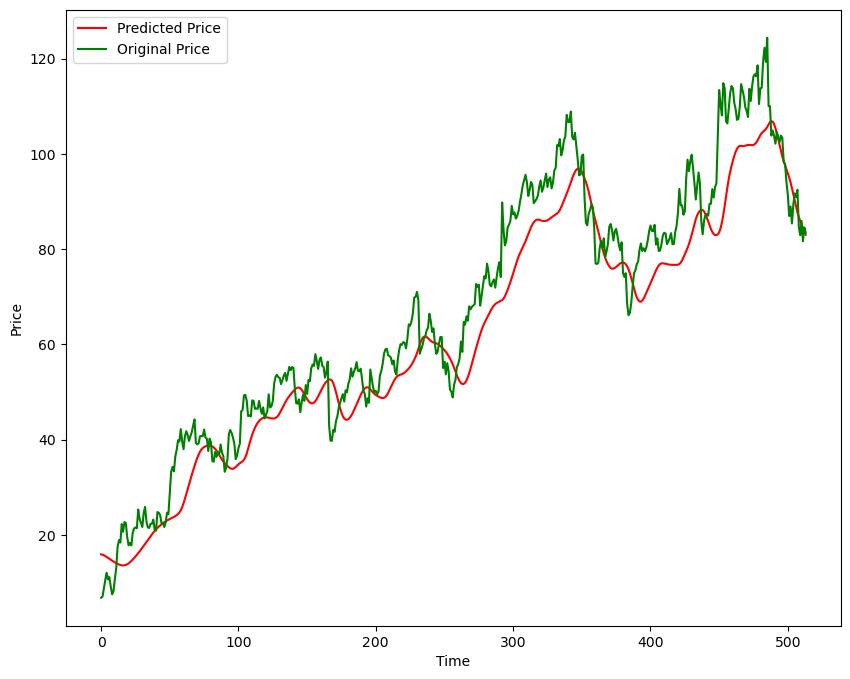

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')